
Solving Towers of Hanoi with 3 disks...
Solution found in 0.000 seconds
Number of moves: 7
Optimal number of moves: 7

Displaying animated solution...


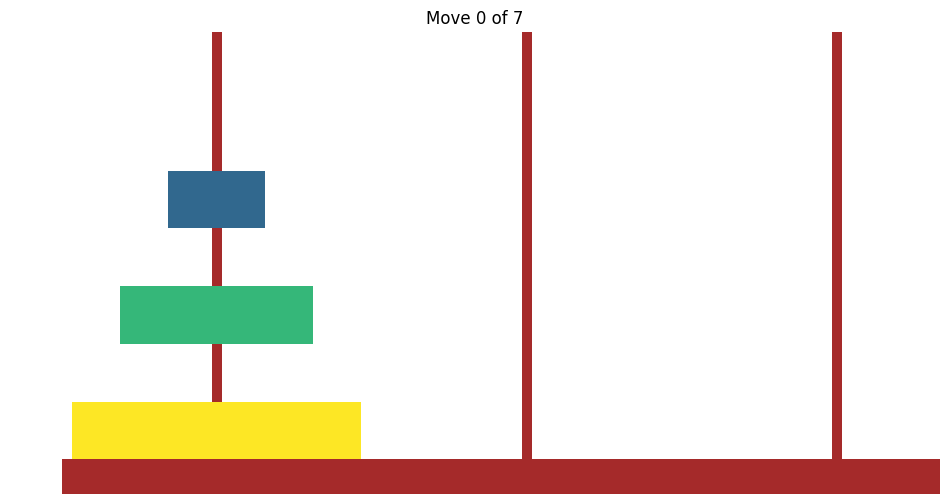

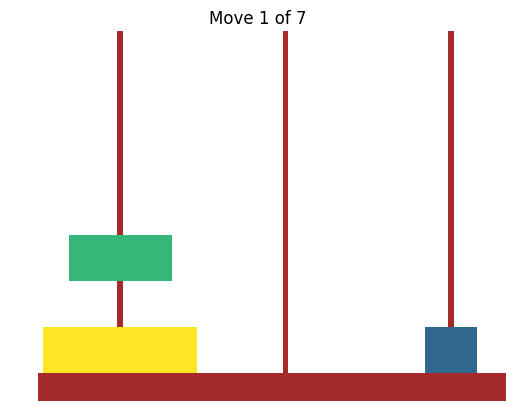

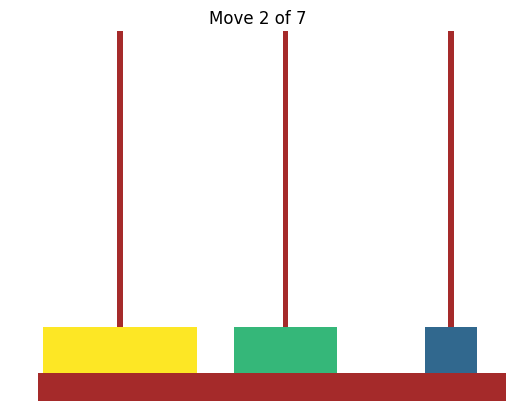

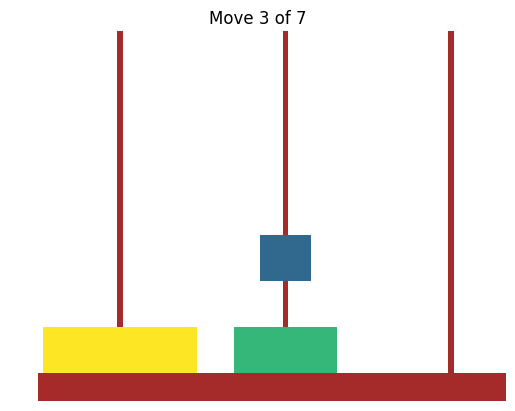

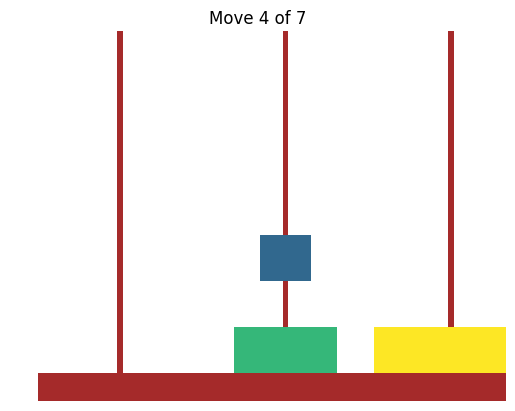

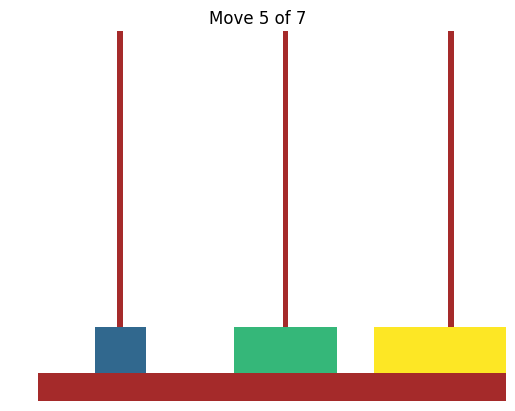

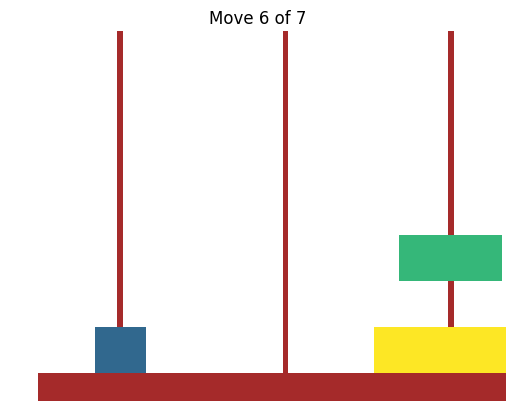

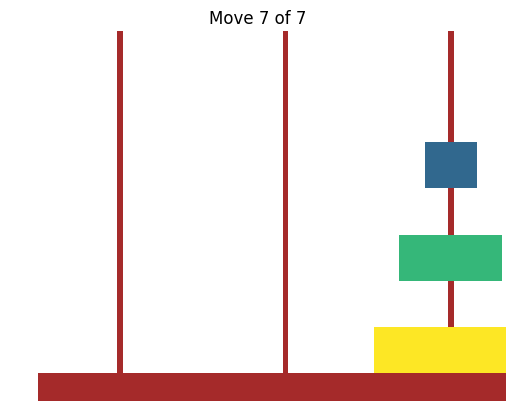


Displaying state space graph...


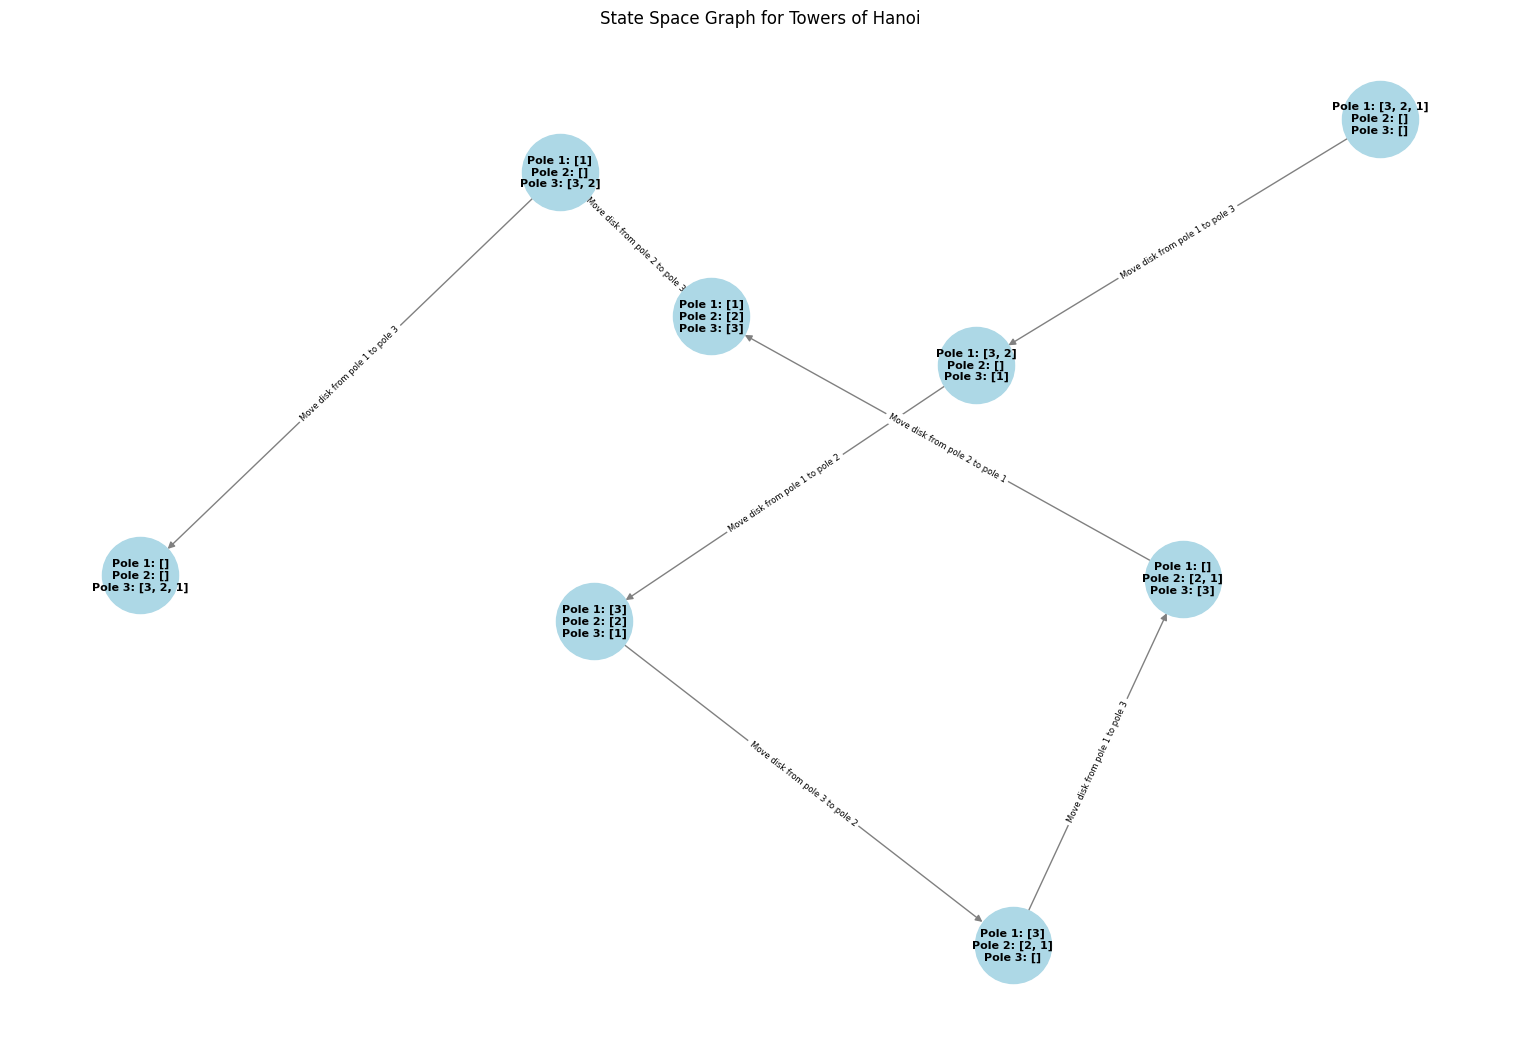

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import time

class TowersOfHanoi:
    def __init__(self, num_disks):
        self.num_disks = num_disks
        self.moves = []
        self.states = []
        self.towers = [[], [], []]
        self.towers[0] = list(range(num_disks, 0, -1))
        self.states.append([tower.copy() for tower in self.towers])
        
    def solve(self, n=None, source=0, auxiliary=1, target=2):
        if n is None:
            n = self.num_disks
            
        if n == 1:
            disk = self.towers[source].pop()
            self.towers[target].append(disk)
            self.moves.append((source, target))
            self.states.append([tower.copy() for tower in self.towers])
        else:
            self.solve(n-1, source, target, auxiliary)
            self.solve(1, source, auxiliary, target)
            self.solve(n-1, auxiliary, source, target)
    
    def draw_state(self, state, move_number=None):
        """Draw a single state of the towers"""
        plt.clf()  # Clear the current figure
        
        # Draw poles
        pole_width = 0.1
        pole_height = self.num_disks + 1
        
        for i in range(3):
            pole_x = i * 3
            # Draw base
            plt.gca().add_patch(Rectangle((pole_x-1.5, 0), 3, 0.3, 
                                        facecolor='brown'))
            # Draw pole
            plt.gca().add_patch(Rectangle((pole_x-pole_width/2, 0), 
                                        pole_width, pole_height, 
                                        facecolor='brown'))
            
            # Draw disks
            for j, disk in enumerate(state[i]):
                disk_width = disk * 2.8/self.num_disks
                plt.gca().add_patch(Rectangle((pole_x-disk_width/2, j+0.3), 
                                            disk_width, 0.5,
                                            facecolor=plt.cm.viridis(disk/self.num_disks)))
        
        plt.xlim(-2, 7)
        plt.ylim(0, pole_height)
        plt.axis('off')
        if move_number is not None:
            plt.title(f'Move {move_number} of {len(self.states)-1}')
    
    def animate(self):
        """Display the solution animation"""
        plt.figure(figsize=(12, 6))
        
        for i, state in enumerate(self.states):
            self.draw_state(state, i)
            plt.pause(1)  # Pause for 1 second between moves
            if i < len(self.states) - 1:
                plt.clf()  # Clear the figure for the next state
        
        plt.show()
    
    def visualize_state_space(self):
        """Visualize the state space graph"""
        plt.figure(figsize=(15, 10))
        G = nx.DiGraph()
        
        def state_to_string(state):
            return '\n'.join([f"Pole {i+1}: {pole}" for i, pole in enumerate(state)])
        
        # Add nodes and edges
        for i in range(len(self.states)-1):
            curr_state = state_to_string(self.states[i])
            next_state = state_to_string(self.states[i+1])
            G.add_edge(curr_state, next_state, 
                      label=f"Move disk from pole {self.moves[i][0]+1} to pole {self.moves[i][1]+1}")
        
        pos = nx.spring_layout(G, k=1, iterations=50)
        
        nx.draw(G, pos, with_labels=True, node_color='lightblue',
                node_size=3000, font_size=8, font_weight='bold',
                arrows=True, edge_color='gray')
        
        edge_labels = nx.get_edge_attributes(G, 'label')
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=6)
        
        plt.title("State Space Graph for Towers of Hanoi")
        plt.show()

def solve_and_display(num_disks):
    print(f"\nSolving Towers of Hanoi with {num_disks} disks...")
    
    start_time = time.time()
    hanoi = TowersOfHanoi(num_disks)
    hanoi.solve()
    end_time = time.time()
    
    print(f"Solution found in {end_time - start_time:.3f} seconds")
    print(f"Number of moves: {len(hanoi.moves)}")
    print(f"Optimal number of moves: {2**num_disks - 1}")
    
    print("\nDisplaying animated solution...")
    hanoi.animate()  # Show the animation
    
    print("\nDisplaying state space graph...")
    hanoi.visualize_state_space()

if __name__ == "__main__":
    solve_and_display(3)  # Solve with 3 disks